In [1456]:
##import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1457]:
## Data Collection
df = pd.read_csv("Housing.csv")

In [1546]:
df['price'].value_counts()

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64

In [1458]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [1460]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [1461]:
## missing values check
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [1462]:
## checking for duplicate records
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [1463]:
## checking for duplicate records
df[df.duplicated()]  ## no duplicate records

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [1464]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1465]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

## Feature Engineering 

### Feature Extraction

In [1468]:
## get all columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [1469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [1470]:
df['area'].dtype

dtype('int64')

In [1471]:
## Numerical Feature
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_feature

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [1472]:
## Categorical Feature 
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_feature

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [1473]:
## Discrete Feature
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<25]
discrete_feature

['bedrooms', 'bathrooms', 'stories', 'parking']

In [1474]:
df['bathrooms'].unique() ## < 25

array([2, 4, 1, 3])

In [1475]:
## Continuous Feature
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
continuous_feature

['price', 'area']

In [1476]:
print(f"Numerical Features: {numerical_feature}")
print(f"Length of numerical features: {len(numerical_feature)}")
print(f"Categorical Features: {categorical_feature} ")
print(f"Length of categorical feature: {len(categorical_feature)}")
print(f"Discrete Features: {discrete_feature}")
print(f"Length of discrete feature: {len(discrete_feature)}")
print(f"Continuous Features: {continuous_feature}")
print(f"Length of continuous featue: {len(continuous_feature)}")


Numerical Features: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Length of numerical features: 6
Categorical Features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'] 
Length of categorical feature: 7
Discrete Features: ['bedrooms', 'bathrooms', 'stories', 'parking']
Length of discrete feature: 4
Continuous Features: ['price', 'area']
Length of continuous featue: 2


### Independent Feature and Dependent Feature

In [1478]:
## independent feature
X = df.drop(["price"],axis=1)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1479]:
## independent feature
y = df["price"]
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [1480]:
# Step 0.2: Split Data into Training and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (436, 12)
X_test shape: (109, 12)
y_train shape: (436,)
y_test shape: (109,)


### Phase 1: Preprocessing for Feature Selection

#### Step 1.1: Identify Column Types

In [1483]:
## Determine which columns are numerical and which are categorical 
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# Your 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' are 'yes'/'no' strings
# 'furnishingstatus' is multi-category string.
# 'bedrooms', 'bathrooms', 'stories', 'parking' are numerical but might be better treated as categorical if few unique values, but let's keep them numerical for now as they are counts.

# Binary 'yes'/'no' columns are often best handled with simple mapping to 0/1 or OneHotEncoding.
# Multi-category strings require OneHotEncoding.
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


Numerical columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


#### Step 1.2: Create a Preprocessing Pipeline (ColumnTransformer)

In [1485]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Useful for combining steps

# Define which numerical columns might need scaling (all of them in your case)
# And which categorical columns need encoding.

# 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'
# are binary 'yes'/'no'. OrdinalEncoder is efficient for this, or OneHotEncoder if preferred.
binary_yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# 'furnishingstatus' is multi-category.
multi_cat_cols = ['furnishingstatus']

preprocessor = ColumnTransformer(
    transformers=[
        ('num_scaler', StandardScaler(), numerical_cols),
        ('binary_encoder', OrdinalEncoder(categories=[['no', 'yes']]*len(binary_yes_no_cols)), binary_yes_no_cols), # Maps 'no' to 0, 'yes' to 1
        ('onehot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), multi_cat_cols) # drop='first' helps with multicollinearity
    ],
    remainder='passthrough' # Keep other columns if any, though none expected here
)

#### Step 1.3: Fit and Transform Training Data, and Reconstruct Column Names

##### Apply the preprocessor to your X_train. This is where you get the numerical array and need to reconstruct names for interpretability.


In [1488]:
# Fit the preprocessor on the training data and transform it
X_train_processed_array = preprocessor.fit_transform(X_train)

# Get the names of the columns after transformation
# This part is crucial for interpreting feature importances later
num_features_out = numerical_cols
binary_features_out = binary_yes_no_cols # Names remain the same for OrdinalEncoder
onehot_features_out = preprocessor.named_transformers_['onehot_encoder'].get_feature_names_out(multi_cat_cols)

all_processed_feature_names = num_features_out + binary_features_out + list(onehot_features_out)

# Convert the processed NumPy array back to a DataFrame with meaningful column names
X_train_processed_df = pd.DataFrame(X_train_processed_array, columns=all_processed_feature_names, index=X_train.index)

print("\nX_train_processed_df (first 5 rows with new column names):")
print(X_train_processed_df.head())
print(f"Shape of X_train_processed_df: {X_train_processed_df.shape}")

# Transform X_test using the *fitted* preprocessor
X_test_processed_array = preprocessor.transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed_array, columns=all_processed_feature_names, index=X_test.index)


X_train_processed_df (first 5 rows with new column names):
         area  bedrooms  bathrooms   stories   parking  mainroad  guestroom  \
46   0.384168  0.055271   1.539173  2.587644  0.367957       1.0        0.0   
93   0.929181  0.055271   1.539173 -0.912499  2.709987       1.0        0.0   
335 -0.607755 -1.283514  -0.557950 -0.912499  1.538972       1.0        0.0   
412 -1.155492  0.055271  -0.557950  0.254215 -0.803059       1.0        0.0   
471 -0.637730  0.055271  -0.557950  0.254215 -0.803059       1.0        0.0   

     basement  hotwaterheating  airconditioning  prefarea  \
46        0.0              0.0              1.0       0.0   
93        1.0              0.0              1.0       0.0   
335       1.0              0.0              1.0       0.0   
412       1.0              0.0              0.0       1.0   
471       0.0              0.0              0.0       0.0   

     furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
46                           

### Phase 2: Feature Importance Analysis & Selection

#### Step 2.1: Analyze Feature Importance (using multiple methods recommended)

##### Tree-Based Models (e.g., RandomForestRegressor): Good for overall importance.
##### Permutation Importance: More robust, model-agnostic, and directly tied to model performance. Highly recommended.
##### Lasso Regression (L1 Penalty): Good for identifying features that can be effectively zeroed out for linear models



--- Phase 2: Feature Importance Analysis ---

  a) Random Forest Feature Importances:
area                               0.468430
bathrooms                          0.151483
airconditioning                    0.062672
parking                            0.057455
stories                            0.057133
bedrooms                           0.048413
furnishingstatus_unfurnished       0.035011
basement                           0.030823
prefarea                           0.030689
hotwaterheating                    0.017226
guestroom                          0.016724
furnishingstatus_semi-furnished    0.013692
mainroad                           0.010250
dtype: float64


/tmp/ipykernel_66195/1989962638.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances_sorted.values, y=rf_importances_sorted.index, palette='viridis')


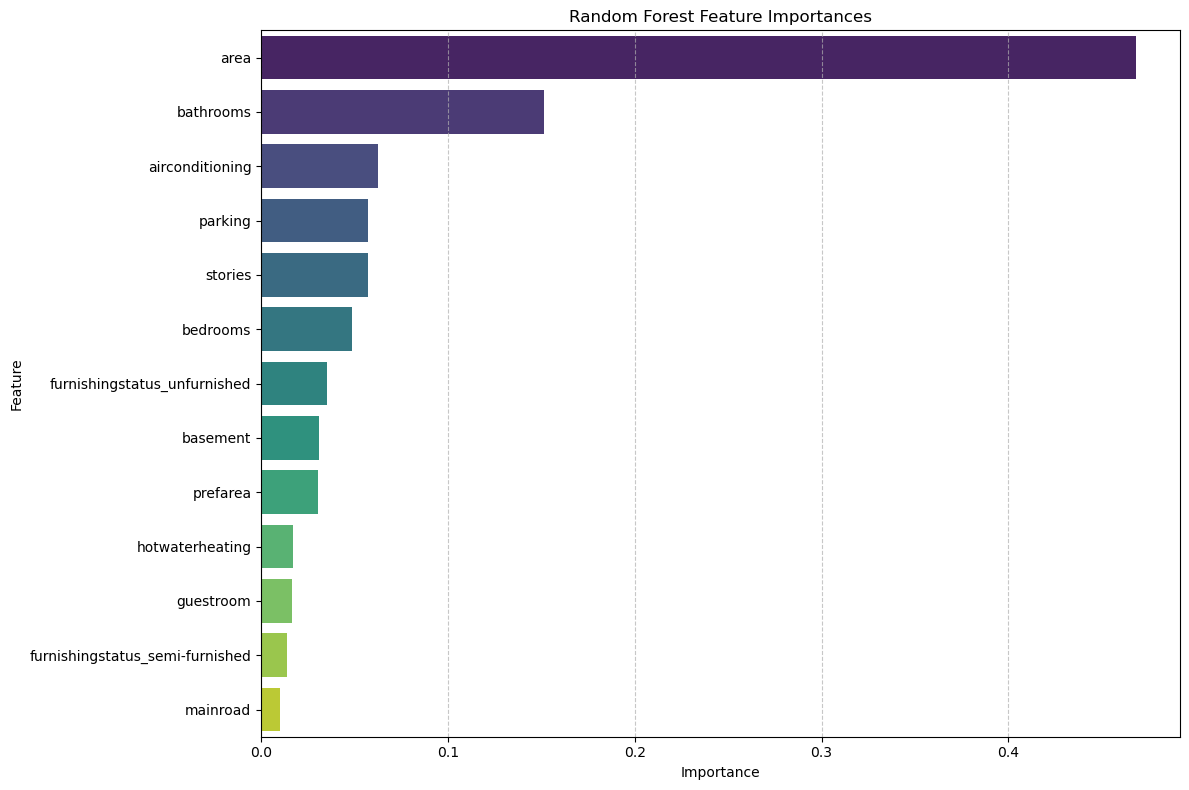


  b) Permutation Importance:
area                               0.524738
bathrooms                          0.270491
airconditioning                    0.119488
stories                            0.092673
bedrooms                           0.085891
parking                            0.080964
basement                           0.074761
furnishingstatus_unfurnished       0.068170
prefarea                           0.048122
hotwaterheating                    0.026943
guestroom                          0.024151
mainroad                           0.014667
furnishingstatus_semi-furnished    0.011760
dtype: float64


/tmp/ipykernel_66195/1989962638.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_importances_sorted.values, y=perm_importances_sorted.index, palette='magma')


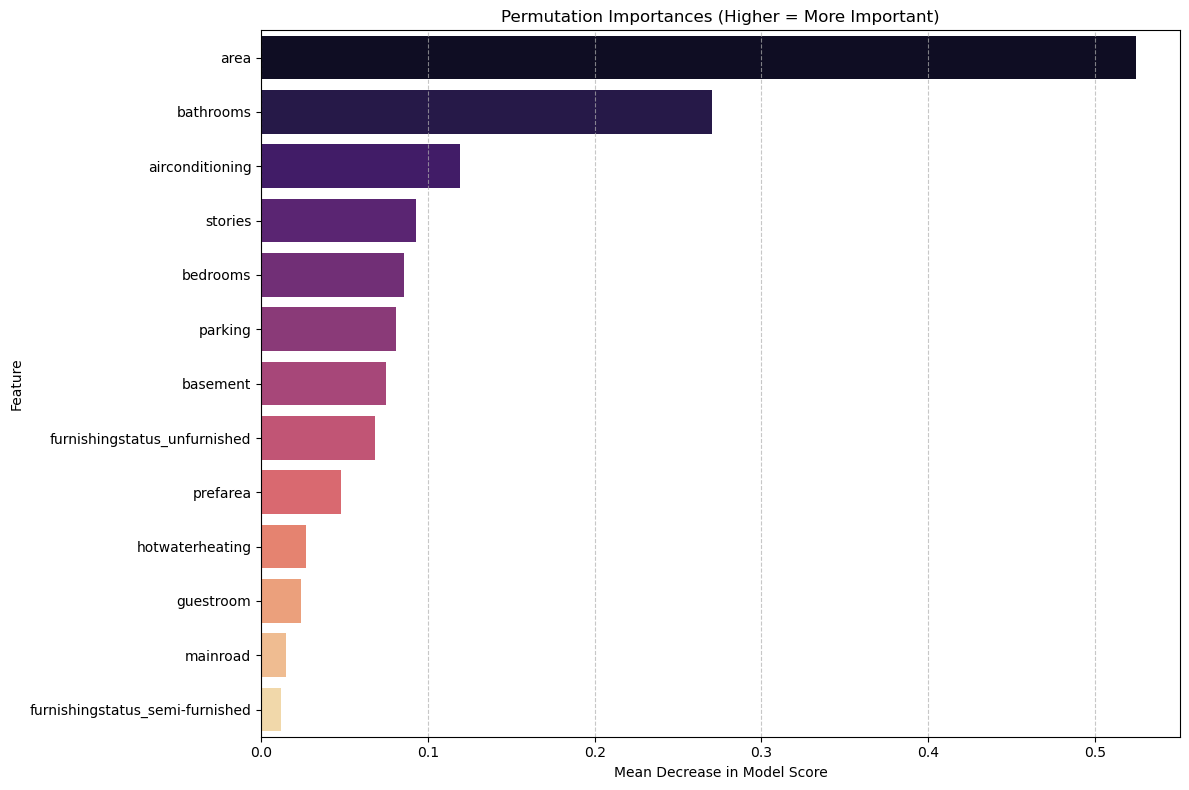


  c) Lasso Regression Coefficients:
airconditioning                    787645.965686
hotwaterheating                    663276.045480
prefarea                           626484.649194
bathrooms                          521829.416846
area                               520379.667741
furnishingstatus_unfurnished       405658.323475
basement                           389519.226836
mainroad                           362322.836431
stories                            349762.809060
guestroom                          227543.297374
parking                            192505.332875
furnishingstatus_semi-furnished    118334.824731
bedrooms                            57028.978754
dtype: float64

Number of features with non-zero coefficients: 13


/tmp/ipykernel_66195/1989962638.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso_coefs_sorted_abs.values, y=lasso_coefs_sorted_abs.index, palette='plasma')


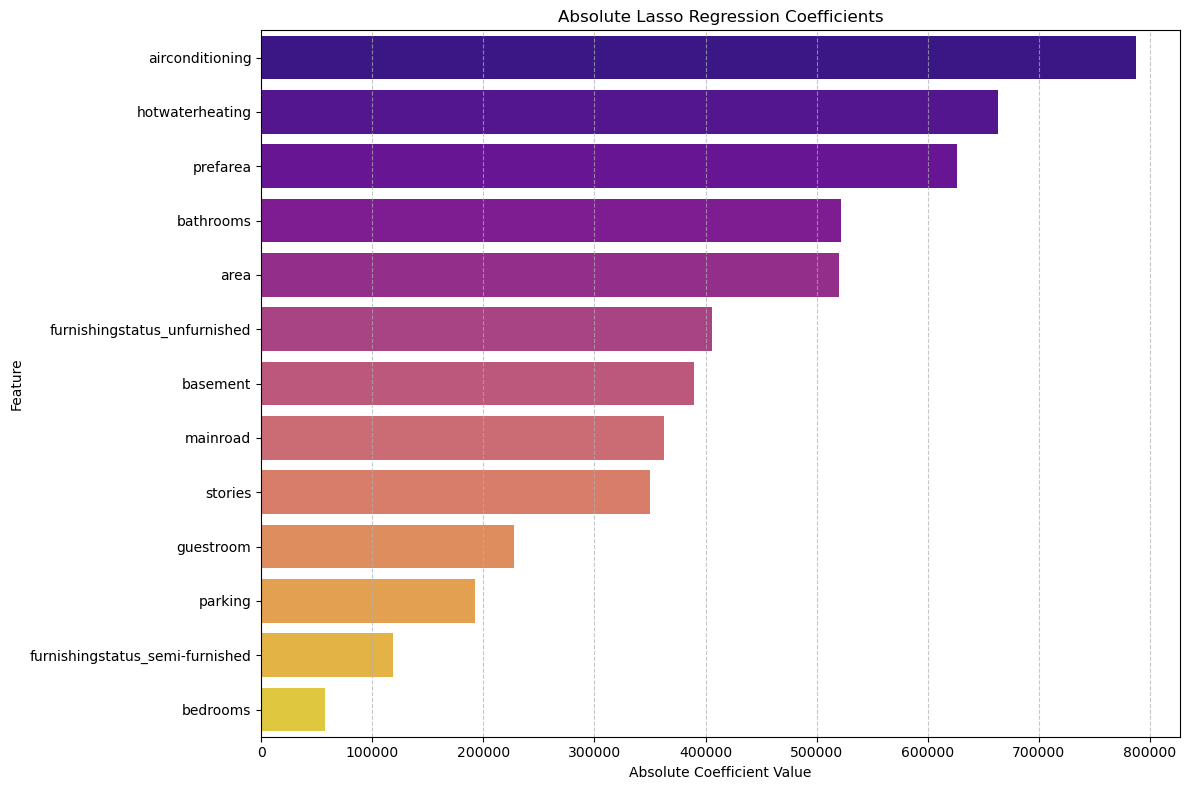

In [1492]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LassoCV

print("\n--- Phase 2: Feature Importance Analysis ---")

# --- a) Random Forest Feature Importances ---
print("\n  a) Random Forest Feature Importances:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_processed_df, y_train)

rf_importances = pd.Series(rf_model.feature_importances_, index=X_train_processed_df.columns)
rf_importances_sorted = rf_importances.sort_values(ascending=False)

print(rf_importances_sorted)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_importances_sorted.values, y=rf_importances_sorted.index, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- b) Permutation Importance (More Robust) ---
print("\n  b) Permutation Importance:")
# This can take a moment for larger datasets
perm_result = permutation_importance(
    rf_model, X_train_processed_df, y_train, n_repeats=10, random_state=42, n_jobs=-1
)
perm_importances = pd.Series(perm_result.importances_mean, index=X_train_processed_df.columns)
perm_importances_sorted = perm_importances.sort_values(ascending=False)

print(perm_importances_sorted)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=perm_importances_sorted.values, y=perm_importances_sorted.index, palette='magma')
plt.title('Permutation Importances (Higher = More Important)')
plt.xlabel('Mean Decrease in Model Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- c) Lasso Regression Coefficients (for linear models' perspective) ---
print("\n  c) Lasso Regression Coefficients:")
# LassoCV finds the best alpha (regularization strength)
lasso_model = LassoCV(cv=5, random_state=42, max_iter=2000, n_jobs=-1)
lasso_model.fit(X_train_processed_df, y_train)

lasso_coefs = pd.Series(lasso_model.coef_, index=X_train_processed_df.columns)
lasso_coefs_sorted_abs = lasso_coefs.abs().sort_values(ascending=False)

print(lasso_coefs_sorted_abs)
print(f"\nNumber of features with non-zero coefficients: {np.sum(lasso_coefs != 0)}")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=lasso_coefs_sorted_abs.values, y=lasso_coefs_sorted_abs.index, palette='plasma')
plt.title('Absolute Lasso Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 2.2: Identify Redundant Features (Multicollinearity)
Look for highly correlated features among themselves in X_train_processed_df.


--- Phase 2: Multicollinearity Check ---


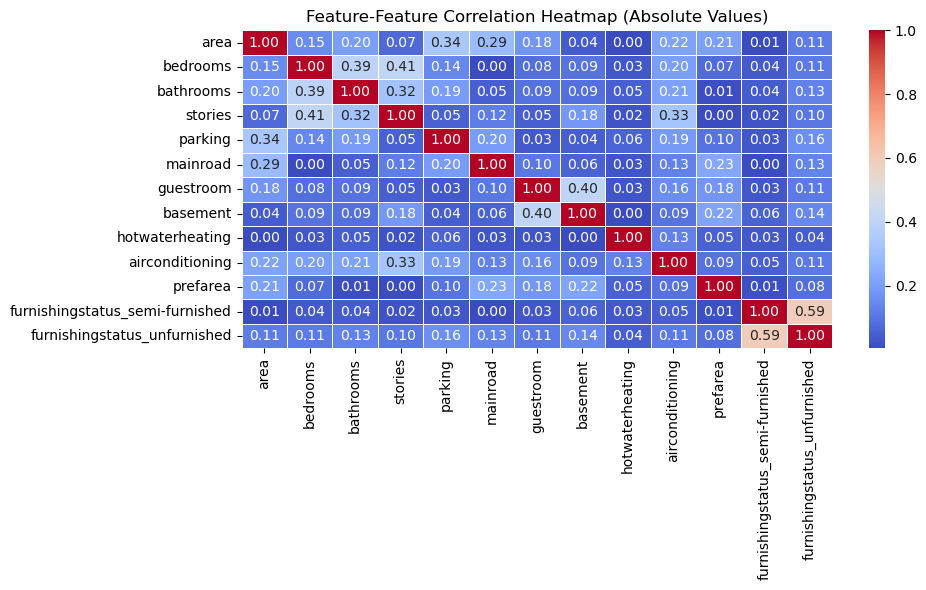

In [1494]:
print("\n--- Phase 2: Multicollinearity Check ---")
plt.figure(figsize=(10, 6))
sns.heatmap(X_train_processed_df.corr().abs(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature-Feature Correlation Heatmap (Absolute Values)')
plt.tight_layout()
plt.show()

# Interpretation:
# Look for values close to 1.0. For example, if 'furnishingstatus_furnished' and 'furnishingstatus_semi-furnished'
# show high negative correlation (after OneHotEncoding and drop='first', they will be distinct but related),
# that's normal for one-hot encoded categories.
# Look for very high correlations between seemingly independent features.
# E.g., if 'area' and 'bedrooms' were 0.9, one might be redundant.

# Optional: Calculate VIF (Variance Inflation Factor) for numerical features if using linear models
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_vif = X_train_processed_df.drop(columns=onehot_features_out) # VIF doesn't play well with OHE features if many are dropped
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_vif.columns
# vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
# print("\nVariance Inflation Factor (VIF):")
# print(vif_data.sort_values('VIF', ascending=False))

#### Step 2.3: Make Feature Selection Decisions
apply your knowledge gained from the plots and metrics.

Action: Based on the charts (low importance, coefficients near zero, low permutation importance, high multicollinearity), decide which features to keep.

Strategy 1 (Thresholding): Pick a minimum importance/coefficient value.

Strategy 2 (Top-N): Select the top N most important features.

Strategy 3 (Manual/Domain Knowledge): If a feature is consistently low importance and doesn't make sense from a domain perspective, drop it. 

If two features are highly correlated and one is clearly more interpretable, keep that one.

In [1496]:
# # Example Decision: Let's say we decide to keep features with permutation importance > threshold (for e.g. 0.005)
# threshold = 0.04
# features_to_keep = perm_importances_sorted[perm_importances_sorted > threshold].index.tolist()

# print(f"\n--- Phase 2: Selected Features ---")
# print(f"Features selected based on importance threshold: {features_to_keep}")

### Implementing Feature Selection Strategies
#### Strategy 1: Thresholding
#### This involves setting a minimum importance value (or maximum absolute coefficient value) and keeping all features that meet or exceed that threshold.



In [1498]:
# --- Strategy 1: Thresholding ---
print("\n--- Strategy 1: Feature Selection by Thresholding ---")

# Define example thresholds (these are just examples, you need to choose them based on your plots!)
# Look at your importance plots: where does the "elbow" or significant drop-off occur?
rf_threshold = 0.03    # For Random Forest importance
perm_threshold = 0.005  # For Permutation importance

# Features selected by each method based on the threshold
selected_by_rf_threshold = rf_importances_sorted[rf_importances_sorted >= rf_threshold].index.tolist()
selected_by_perm_threshold = perm_importances_sorted[perm_importances_sorted >= perm_threshold].index.tolist()

print(f"\nFeatures selected by Random Forest Importance (threshold={rf_threshold}):")
print(selected_by_rf_threshold)
print(f"Count: {len(selected_by_rf_threshold)}")

print(f"\nFeatures selected by Permutation Importance (threshold={perm_threshold}):")
print(selected_by_perm_threshold)
print(f"Count: {len(selected_by_perm_threshold)}")



--- Strategy 1: Feature Selection by Thresholding ---

Features selected by Random Forest Importance (threshold=0.03):
['area', 'bathrooms', 'airconditioning', 'parking', 'stories', 'bedrooms', 'furnishingstatus_unfurnished', 'basement', 'prefarea']
Count: 9

Features selected by Permutation Importance (threshold=0.005):
['area', 'bathrooms', 'airconditioning', 'stories', 'bedrooms', 'parking', 'basement', 'furnishingstatus_unfurnished', 'prefarea', 'hotwaterheating', 'guestroom', 'mainroad', 'furnishingstatus_semi-furnished']
Count: 13


### Phase 3: Building the Final Model Pipeline with Feature Selection

Ensures that your feature selection is applied consistently and correctly.

#### Step 3.1: Create a Final Pipeline with Preprocessing, Selection, and Model

##### This is the most robust way to ensure that all steps (preprocessing, feature selection) are applied correctly to both training and test data, preventing data leakage.

#### Random Forest Importance

In [1503]:
from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LinearRegression # No longer the final model
from sklearn.ensemble import RandomForestRegressor # This will be our final model
from sklearn.ensemble import GradientBoostingRegressor # The current final model choice
from sklearn.pipeline import Pipeline # Make sure Pipeline is imported



print("\n--- Phase 3: Building Final Model Pipeline with Feature Selection ---")

# Define the estimator that SelectFromModel will use to decide importance
# This remains a good choice for feature importance
# selector_estimator = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
selector_estimator = RandomForestRegressor(
                                                    n_estimators = 300,
                                                    min_samples_split = 5, 
                                                    max_features = 'sqrt', 
                                                    max_depth = 20, 
                                                    criterion = 'absolute_error',
                                                   )


# # Create the SelectFromModel transformer
# feature_selection_transformer = SelectFromModel(
#     estimator=selector_estimator,
#     threshold=threshold, # Example threshold, tune this!
#     prefit=False
# )

# Update SelectFromModel with your chosen threshold (e.g., from permutation importance)
feature_selection_transformer_threshold = SelectFromModel(
    estimator=selector_estimator,
    threshold=rf_threshold, # Use your chosen threshold here!
    prefit=False
)

# Define your final prediction model as RandomForestRegressor
final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Changed this line!

# Create the full pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Applies scaling and encoding
    ('feature_selector', feature_selection_transformer_threshold), # Selects features based on importance
    ('regressor', final_model) # Your final RandomForestRegressor model
])

print("\nFinal Pipeline Structure (with RandomForestRegressor as final model):")
print(final_pipeline)

# Continue with fitting and evaluation as before:
# final_pipeline.fit(X_train, y_train)
# y_test_pred = final_pipeline.predict(X_test)
# ... evaluate ...


--- Phase 3: Building Final Model Pipeline with Feature Selection ---

Final Pipeline Structure (with RandomForestRegressor as final model):
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('binary_encoder',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'],
               

#### Step 3.2: Train and Evaluate the Final Pipeline
#### Fit this entire pipeline on your original X_train, y_train. The pipeline handles all preprocessing and selection internally.

In [1505]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("\n--- Phase 3: Training and Evaluating Final Pipeline ---")

# Fit the entire pipeline
final_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = final_pipeline.predict(X_train)
y_test_pred = final_pipeline.predict(X_test)

# Evaluate performance
print(f"\n--- Training Metrics ---")
print(f"R-squared (Train): {r2_score(y_train, y_train_pred):.4f}")
print(f"MAE (Train): {mean_absolute_error(y_train, y_train_pred):,.0f}")
print(f"RMSE (Train): {np.sqrt(mean_squared_error(y_train, y_train_pred)):,.0f}")

print(f"\n--- Test Metrics ---")
print(f"R-squared (Test): {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE (Test): {mean_absolute_error(y_test, y_test_pred):,.0f}")
print(f"RMSE (Test): {np.sqrt(mean_squared_error(y_test, y_test_pred)):,.0f}")

# Check the number of features selected by the pipeline
# This can be tricky to directly get the names from within the pipeline's SelectFromModel
# but you can infer by comparing performance before/after and observing feature importance plots.
selected_features_count = final_pipeline.named_steps['feature_selector'].n_features_in_
print(f"\nNumber of features fed into the final regressor after selection: {selected_features_count}")
# Note: n_features_in_ gives count of features received by the selector, not necessarily the count of selected features.
# To get the exact selected feature names from the pipeline after fit, it's more complex, often needing access to
# `_get_support_mask()` of the `SelectFromModel` and the names from the preprocessor.


--- Phase 3: Training and Evaluating Final Pipeline ---

--- Training Metrics ---
R-squared (Train): 0.9487
MAE (Train): 282,402
RMSE (Train): 397,638

--- Test Metrics ---
R-squared (Test): 0.6020
MAE (Test): 1,046,595
RMSE (Test): 1,418,328

Number of features fed into the final regressor after selection: 13


#### Permutation Importnace

In [1507]:
from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LinearRegression # No longer the final model
from sklearn.ensemble import RandomForestRegressor # This will be our final model
from sklearn.ensemble import GradientBoostingRegressor # The current final model choice
from sklearn.pipeline import Pipeline # Make sure Pipeline is imported



print("\n--- Phase 3: Building Final Model Pipeline with Feature Selection ---")

# Define the estimator that SelectFromModel will use to decide importance
# This remains a good choice for feature importance
# selector_estimator = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
selector_estimator = RandomForestRegressor(
                                                    n_estimators = 300,
                                                    min_samples_split = 5, 
                                                    max_features = 'sqrt', 
                                                    max_depth = 20, 
                                                    criterion = 'absolute_error',
                                                   )


# # Create the SelectFromModel transformer
# feature_selection_transformer = SelectFromModel(
#     estimator=selector_estimator,
#     threshold=threshold, # Example threshold, tune this!
#     prefit=False
# )

# Update SelectFromModel with your chosen threshold (e.g., from permutation importance)
feature_selection_transformer_threshold = SelectFromModel(
    estimator=selector_estimator,
    threshold=perm_threshold, # Use your chosen threshold here!
    prefit=False
)

# Define your final prediction model as RandomForestRegressor
final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Changed this line!

# Create the full pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Applies scaling and encoding
    ('feature_selector', feature_selection_transformer_threshold), # Selects features based on importance
    ('regressor', final_model) # Your final RandomForestRegressor model
])

print("\nFinal Pipeline Structure (with RandomForestRegressor as final model):")
print(final_pipeline)

# Continue with fitting and evaluation as before:
# final_pipeline.fit(X_train, y_train)
# y_test_pred = final_pipeline.predict(X_test)
# ... evaluate ...


--- Phase 3: Building Final Model Pipeline with Feature Selection ---

Final Pipeline Structure (with RandomForestRegressor as final model):
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('binary_encoder',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'],
               

In [1508]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("\n--- Phase 3: Training and Evaluating Final Pipeline ---")

# Fit the entire pipeline
final_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = final_pipeline.predict(X_train)
y_test_pred = final_pipeline.predict(X_test)

# Evaluate performance
print(f"\n--- Training Metrics ---")
print(f"R-squared (Train): {r2_score(y_train, y_train_pred):.4f}")
print(f"MAE (Train): {mean_absolute_error(y_train, y_train_pred):,.0f}")
print(f"RMSE (Train): {np.sqrt(mean_squared_error(y_train, y_train_pred)):,.0f}")

print(f"\n--- Test Metrics ---")
print(f"R-squared (Test): {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE (Test): {mean_absolute_error(y_test, y_test_pred):,.0f}")
print(f"RMSE (Test): {np.sqrt(mean_squared_error(y_test, y_test_pred)):,.0f}")

# Check the number of features selected by the pipeline
# This can be tricky to directly get the names from within the pipeline's SelectFromModel
# but you can infer by comparing performance before/after and observing feature importance plots.
selected_features_count = final_pipeline.named_steps['feature_selector'].n_features_in_
print(f"\nNumber of features fed into the final regressor after selection: {selected_features_count}")
# Note: n_features_in_ gives count of features received by the selector, not necessarily the count of selected features.
# To get the exact selected feature names from the pipeline after fit, it's more complex, often needing access to
# `_get_support_mask()` of the `SelectFromModel` and the names from the preprocessor.


--- Phase 3: Training and Evaluating Final Pipeline ---

--- Training Metrics ---
R-squared (Train): 0.9499
MAE (Train): 278,291
RMSE (Train): 392,853

--- Test Metrics ---
R-squared (Test): 0.6124
MAE (Test): 1,021,151
RMSE (Test): 1,399,758

Number of features fed into the final regressor after selection: 13
